# Anomaly catalog demo

Author: Kate Storey-Fisher

Description: This notebook demonstrates how to access and explore the anomaly catalog produced with our GAN-based anomaly detection method.

In [1]:
import h5py
import pandas as pd
import pickle
import numpy as np

from matplotlib import pyplot as plt

## Derived score catalogs

Let's first load in the light catalogs that have the object IDs and derived anomaly score information. We have this for both the full catalog and just the high-anomaly ones, in the form of a pickle file:

In [2]:
cat_full_fn = '../anomaly_catalogs/anomaly_catalog_hsc_full.p'
with open(cat_full_fn, 'rb') as ff:
    cat_full = pickle.load(ff)

cat_anom_fn = '../anomaly_catalogs/anomaly_catalog_hsc_disc3sigma.p'
with open(cat_anom_fn, 'rb') as fa:
    cat_anom = pickle.load(fa)

In [3]:
cat_full.head()

,HSC_object_id,ra,dec,discriminator_score_normalized,generator_score_normalized,combined_score_normalized
idx,,,,,,
0,43356767140190800,216.802789,1.510658,0.056575,-0.310003,-0.125338
1,43356767140215426,216.784996,1.495341,-0.332557,0.219678,-0.074659
2,43356767140215465,216.762722,1.495824,-0.632417,-0.834673,-0.776109
3,43356767140215565,216.882569,1.497911,-0.741359,-0.728228,-0.783107
4,43356767140215633,216.909050,1.496337,0.847666,0.779796,0.868637


Note that the "idx" column is the index in the original HSC dataset, which we use as its label throughout this work. 

For the full sample, let's look at the distribution of score values:

Text(0, 0.5, 'count')

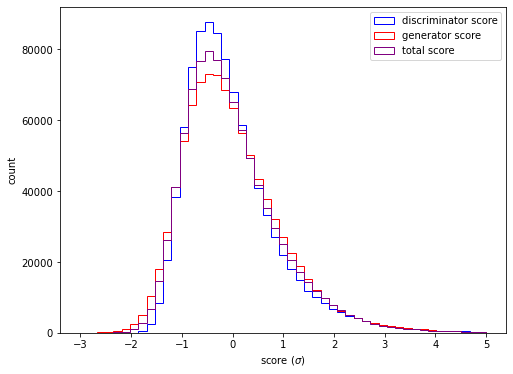

In [4]:
plt.figure(figsize=(8,6))
bins = np.linspace(-3, 5, 50)
plt.hist(cat_full['discriminator_score_normalized'], bins=bins, histtype='step', color='blue', label='discriminator score')
plt.hist(cat_full['generator_score_normalized'], bins=bins, histtype='step', color='red', label='generator score')
plt.hist(cat_full['combined_score_normalized'], bins=bins, histtype='step', color='purple', label='total score')
plt.legend()
plt.xlabel(r'score ($\sigma$)')
plt.ylabel('count')

For the high-anomaly sample, we can look at the discriminator vs. generator scores for the objects:

Text(0, 0.5, '$s_\\mathrm{disc}$, discriminator score ($\\sigma$)')

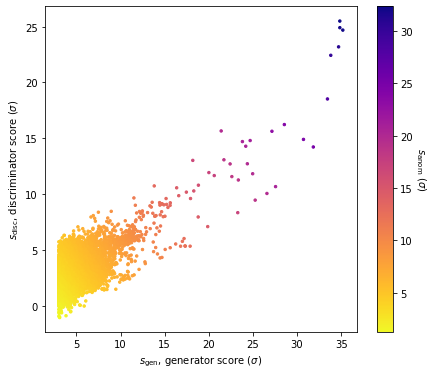

In [5]:
fig = plt.figure(figsize=(7,6))
ax = plt.gca()
scat = plt.scatter(cat_anom['discriminator_score_normalized'], cat_anom['generator_score_normalized'], 
            c=cat_anom['combined_score_normalized'], s=6, alpha=1, cmap='plasma_r')
cbar = fig.colorbar(scat, ax=ax)
cbar.set_label(r'$s_\mathrm{anom}$ ($\sigma$)', rotation=270, labelpad=15)
ax.set_xlabel(r"$s_\mathrm{gen}$, generator score ($\sigma$)")
ax.set_ylabel(r"$s_\mathrm{disc}$, discriminator score ($\sigma$)")

## Full image catalogs

Now let's look at the image catalogs. These you'll have to download from google drive at this link: `https://drive.google.com/drive/folders/1jPR7Quv_KCT_fJ1sCpny6YKF3T9cAUaa?usp=sharing`. 

The high-anomaly catalog (`results_gri_lambda0.3_3sigd.h5`) is 1.1GB and can be downloaded with (on the command line):
```
wget --no-check-certificate -r 'https://docs.google.com/uc?export=download&id=1mYh0GqNxca2sIuyqk4Q8H3aQGy4nh738' -O 'results_gri_lambda0.3_3sigd.h5'
```

The full catalog (`results_gri_lambda0.3.h5`) is 73GB (careful here!!) and can be downloaded with
```
wget --no-check-certificate -r 'https://docs.google.com/uc?export=download&id=1mLGJ9fq1PVLuT0z972kQE_ktGtZH0hUr' -O 'results_gri_lambda0.3.h5'
```

Once you have the data, make sure to edit the paths to the appropriate file locations.

In [6]:
res_full_fn = '/scratch/ksf293/anomalies/results/results_gri_lambda0.3.h5'
res_full = h5py.File(res_full_fn, 'r')

res_anom_fn = '/scratch/ksf293/anomalies/results/results_gri_lambda0.3_3sigd.h5'
res_anom = h5py.File(res_anom_fn, 'r')

print(res_full.keys())

<KeysViewHDF5 ['anomaly_scores', 'anomaly_scores_sigma', 'disc_scores', 'disc_scores_sigma', 'gen_scores', 'gen_scores_sigma', 'idxs', 'object_ids', 'reals', 'reconstructed', 'residuals']>


Let's look at the lowest and highest scoring anomalies in the full sample:

Lowest discriminator score object: idx=21575, s_disc=-2.290271043777466


(-0.5, 95.5, 95.5, -0.5)

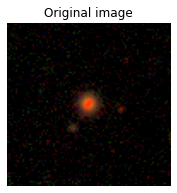

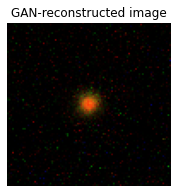

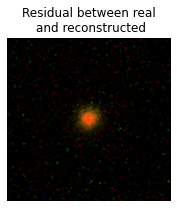

In [7]:
loc_lowest = np.argmin(res_full['disc_scores_sigma'])
print(f"Lowest discriminator score object: idx={res_full['idxs'][loc_lowest]}, s_disc={res_full['disc_scores_sigma'][loc_lowest]}")

plt.figure(figsize=(3,3))
plt.title('Original image')
plt.imshow(res_full['reals'][loc_lowest])
plt.axis('off')

plt.figure(figsize=(3,3))
plt.title('GAN-reconstructed image')
plt.imshow(res_full['reconstructed'][loc_lowest])
plt.axis('off')

plt.figure(figsize=(3,3))
plt.title('Residual between real\n and reconstructed')
plt.imshow(res_full['reconstructed'][loc_lowest])
plt.axis('off')

Highest discriminator score object: idx=384481, s_disc=35.17558670043945


(-0.5, 95.5, 95.5, -0.5)

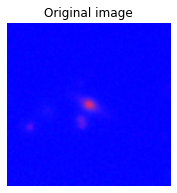

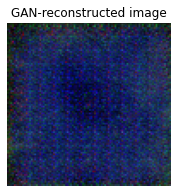

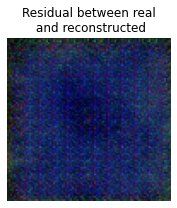

In [8]:
loc_highest = np.argmax(res_full['disc_scores_sigma'])
print(f"Highest discriminator score object: idx={res_full['idxs'][loc_highest]}, s_disc={res_full['disc_scores_sigma'][loc_highest]}")

plt.figure(figsize=(3,3))
plt.title('Original image')
plt.imshow(res_full['reals'][loc_highest])
plt.axis('off')

plt.figure(figsize=(3,3))
plt.title('GAN-reconstructed image')
plt.imshow(res_full['reconstructed'][loc_highest])
plt.axis('off')

plt.figure(figsize=(3,3))
plt.title('Residual between real\n and reconstructed')
plt.imshow(res_full['reconstructed'][loc_highest])
plt.axis('off')

Let's also look at a random sample of the high-anomaly images:

In [9]:
n_rows = 6
n_cols = 6
n_sample = n_rows*n_cols
locs = np.random.choice(range(len(res_anom['reals'])), size=n_sample, replace=False)
locs = sorted(locs)
reals_anom_sample = res_anom['reals'][locs]
NSIDE = reals_anom_sample.shape[1]
NBANDS = reals_anom_sample.shape[-1]

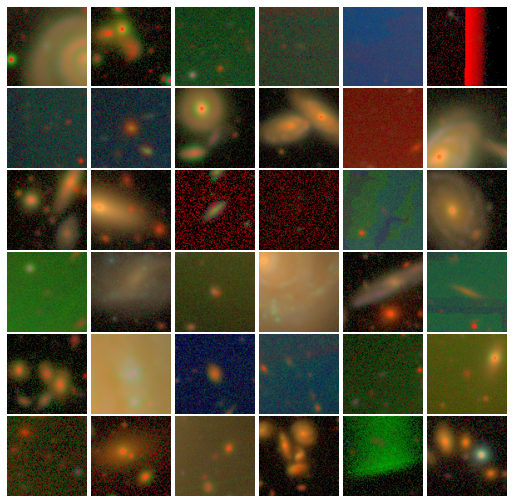

In [10]:
loc_highest = np.argmax(res_full['disc_scores_sigma'])

im_size = 1.5
fig, axarr = plt.subplots(n_rows, n_cols, figsize=(n_rows*im_size, n_cols*im_size))
plt.subplots_adjust(hspace=0.03, wspace=0.02)
count = 0
for i in range(n_rows):
    for j in range(n_cols):
        ax = axarr[i][j]
        
        ax.imshow(reals_anom_sample[count])
        count += 1
        
        ax.axis('off')

## Autoencoded results

The results from the autoencoder are stored in a separate file. These are 64-dimensional latent-space representations of the residual images. (We also provide the autoencoded real images as a comparison, just replace 'residuals' with 'reals'.)

In [11]:
auto_fn = '../anomaly_catalogs/autoencoded_disc3sigma_residuals.npy'
auto = np.load(auto_fn, allow_pickle=True)
latents, idxs, discriminator_scores_normalized = auto.T
latents = np.array([np.array(l) for l in latents])
print(latents.shape)

(13477, 64)


There is lots to do with this dataset! If you do anything cool feel free to let me know, at `k.sf@nyu.edu`.